<a href="https://colab.research.google.com/github/VCornejo10/U1_Producto_Computacional_TICD/blob/main/Unidad_1_Producto_Computacional_TICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis Exploratorio y Preprocesamiento del Dataset MHEALTH
Este notebook de Python está diseñado para el primer producto computacional del curso de Taller Integrado de Ciencia de Datos. El objetivo es realizar un análisis exploratorio de datos (EDA) y un preprocesamiento inicial del dataset MHEALTH (Mobile Health Dataset for Activity Recognition).

El proceso se divide en las siguientes etapas:

1. Carga del dataset: Obtención y lectura de los archivos de datos.
2. Exploración de datos: Entendimiento de la estructura, dimensiones, tipos de variables, valores faltantes y estadísticas básicas.
3. Visualización: Creación de gráficos para comprender la distribución de las variables y detectar valores atípicos.
4. Limpieza y preprocesamiento: Manejo de valores atípicos y estandarización de las variables numéricas.








##1.- Cargar el dataset
Comenzamos importando las bibliotecas necesarias y descargando el dataset MHEALTH, que se encuentra en un archivo comprimido. Los datos de los 10 sujetos están en archivos de texto separados, por lo que los cargamos y los unimos en un único DataFrame para facilitar el análisis.

In [7]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io

# Carga del Dataset
print("Descargando el dataset MHEALTH desde el repositorio de la UCI...")

# URL del dataset MHEALTH en el repositorio de la UCI
url = "https://archive.ics.uci.edu/static/public/319/mhealth+dataset.zip"
response = requests.get(url)

# Descomprimir el archivo zip
try:
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall()
    print("Archivo ZIP extraído correctamente.")
except zipfile.BadZipFile:
    print("Error: El archivo descargado no es un archivo ZIP válido.")
    exit()

# Buscar la carpeta que contiene los archivos de registro después de la extracción
# Esto hace el código más robusto a cambios en la estructura de la carpeta
extracted_dirs = [d for d in os.listdir('.') if os.path.isdir(d) and 'MHEALTH' in d.upper()]

if not extracted_dirs:
    print("Error: No se encontró la carpeta del dataset después de la extracción.")
    exit()

# Asumimos que la primera carpeta encontrada es la correcta
data_folder = extracted_dirs[0]

all_data = []

# Cargar los datos de los 10 sujetos
for i in range(1, 11):
    file_path = os.path.join(data_folder, f"mHealth_subject{i}.log")

    # Comprobar si el archivo existe
    if os.path.exists(file_path):
        # El archivo usa tabulaciones como separador y no tiene encabezado
        df = pd.read_csv(file_path, sep='\t', header=None)
        all_data.append(df)
    else:
        print(f"Error: Archivo no encontrado: {file_path}")

# Verificar si se cargaron datos antes de concatenar
if all_data:
    mhealth_df = pd.concat(all_data, ignore_index=True)
    print("Dataset cargado y concatenado correctamente.")
    print(f"Dimensiones del dataset: {mhealth_df.shape}")

    # Asignar nombres a las columnas (23 sensores + 1 actividad)
    column_names = [f"sensor_{i}" for i in range(1, 24)] + ["Activity"]
    mhealth_df.columns = column_names

    print("\nPrimeras 5 filas del dataset:")
    print(mhealth_df.head())

else:
    print("No se encontraron archivos de datos para cargar. Por favor, verifica la URL y la estructura del archivo ZIP.")

Descargando el dataset MHEALTH desde el repositorio de la UCI...
Archivo ZIP extraído correctamente.
Dataset cargado y concatenado correctamente.
Dimensiones del dataset: (1215745, 24)

Primeras 5 filas del dataset:
   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   -9.8184  0.009971   0.29563  0.004186  0.004186    2.1849   -9.6967   
1   -9.8489  0.524040   0.37348  0.004186  0.016745    2.3876   -9.5080   
2   -9.6602  0.181850   0.43742  0.016745  0.037677    2.4086   -9.5674   
3   -9.6507  0.214220   0.24033  0.079540  0.117220    2.1814   -9.4301   
4   -9.7030  0.303890   0.31156  0.221870  0.205130    2.4173   -9.3889   

   sensor_8  sensor_9  sensor_10  ...  sensor_15  sensor_16  sensor_17  \
0   0.63077  0.103900   -0.84053  ...    -8.6499    -4.5781   0.187760   
1   0.68389  0.085343   -0.83865  ...    -8.6275    -4.3198   0.023595   
2   0.68113  0.085343   -0.83865  ...    -8.5055    -4.2772   0.275720   
3   0.55031  0.085343   -0.83865  ...

##2.- Exploración de los Datos
Una vez que los datos están cargados, realizamos una exploración inicial para entender su estructura y contenido.

###2.1.- Dimensiones y Tipos de Variables
Utilizamos los métodos `.shape` y `.info()` para obtener una vista general del DataFrame.

In [8]:
# Mostrar las primeras 5 filas para verificar la carga
print("\nPrimeras 5 filas del dataset:")
print(mhealth_df.head())

# Obtener información sobre las columnas y tipos de datos
print("\nInformación del DataFrame:")
mhealth_df.info()


Primeras 5 filas del dataset:
   sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0   -9.8184  0.009971   0.29563  0.004186  0.004186    2.1849   -9.6967   
1   -9.8489  0.524040   0.37348  0.004186  0.016745    2.3876   -9.5080   
2   -9.6602  0.181850   0.43742  0.016745  0.037677    2.4086   -9.5674   
3   -9.6507  0.214220   0.24033  0.079540  0.117220    2.1814   -9.4301   
4   -9.7030  0.303890   0.31156  0.221870  0.205130    2.4173   -9.3889   

   sensor_8  sensor_9  sensor_10  ...  sensor_15  sensor_16  sensor_17  \
0   0.63077  0.103900   -0.84053  ...    -8.6499    -4.5781   0.187760   
1   0.68389  0.085343   -0.83865  ...    -8.6275    -4.3198   0.023595   
2   0.68113  0.085343   -0.83865  ...    -8.5055    -4.2772   0.275720   
3   0.55031  0.085343   -0.83865  ...    -8.6279    -4.3163   0.367520   
4   0.71098  0.085343   -0.83865  ...    -8.7008    -4.1459   0.407290   

   sensor_18  sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  Acti

**Reflexión**: El dataset tiene más de un millón de filas y 24 columnas. Observamos que todas las columnas de sensores son de tipo `float64` y la columna `Activity` es de tipo `int64`. No hay valores nulos, lo que simplifica la limpieza inicial.

###2.2.- Medidas Estadísticas Básicas
Generamos un resumen estadístico de las columnas numéricas con `*.describe()*`. Esto nos da una idea de la media, desviación estándar, valores mínimos y máximos, y los cuartiles de cada sensor.

In [9]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las columnas de sensores:")
print(mhealth_df.describe())


Resumen estadístico de las columnas de sensores:
           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean  -8.522361e+00 -2.140013e-01 -1.055950e+00 -5.122403e-03 -4.506434e-03   
std    4.075293e+00  2.138954e+00  3.574163e+00  7.465971e-01  7.270395e-01   
min   -2.243800e+01 -2.018800e+01 -1.840100e+01 -8.619600e+00 -8.619600e+00   
25%   -9.804000e+00 -1.272900e+00 -2.867300e+00 -2.344300e-01 -1.883800e-01   
50%   -9.311400e+00 -3.538100e-01 -8.702000e-01 -7.116700e-02 -4.186300e-02   
75%   -7.637100e+00  7.097800e-01  7.259100e-01  1.590800e-01  1.507100e-01   
max    1.909400e+01  2.092700e+01  2.619600e+01  8.514900e+00  8.519100e+00   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean   1.494200e+00 -9.692878e+00 -9.548056e-01 -1.598951e-03 -6.166318e-01   
s

**Reflexión**: Notamos que las medias y desviaciones estándar de los diferentes sensores varían significativamente, lo que confirma que las variables están en escalas distintas. Esto justifica la necesidad de estandarización o normalización antes de aplicar modelos de machine learning.

##3.- Visualización de Datos
La visualización es clave para identificar la distribución de las variables y detectar valores atípicos.

###3.1.- Distribución de las Actividades
Verificamos la distribución de la variable objetivo, `Activity`, para saber si el dataset está balanceado.




Frecuencia de cada tipo de actividad:
Activity
0     872550
1      30720
2      30720
3      30720
4      30720
5      30720
6      28315
7      29441
8      29337
9      30720
10     30720
11     30720
12     10342
Name: count, dtype: int64


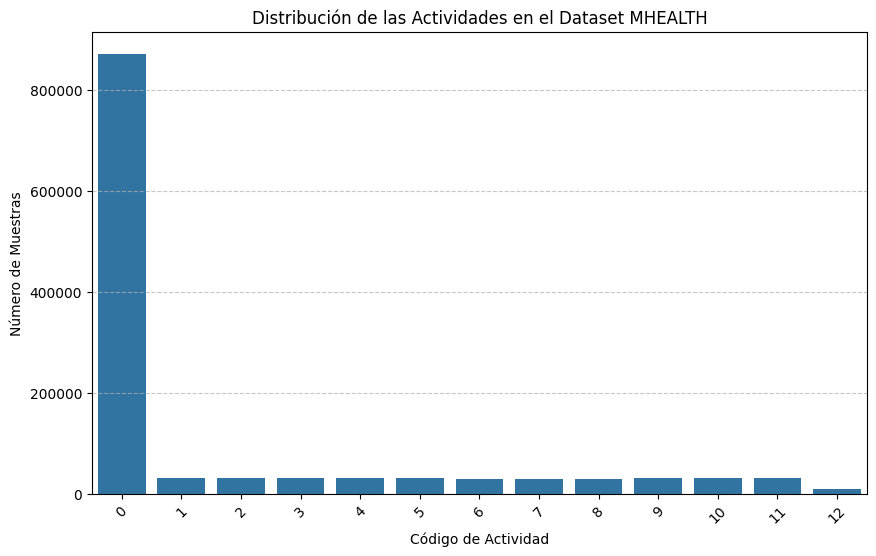

In [10]:
# Contar la frecuencia de cada actividad
print("\nFrecuencia de cada tipo de actividad:")
print(mhealth_df['Activity'].value_counts().sort_index())

# Visualizar la distribución de las actividades
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=mhealth_df)
plt.title('Distribución de las Actividades en el Dataset MHEALTH')
plt.xlabel('Código de Actividad')
plt.ylabel('Número de Muestras')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reflexión**: Los códigos de actividad del 1 al 12 tienen un número considerable de muestras, mientras que el código 0 (Reposo) es la clase dominante. El código 13 no tiene muestras, por lo que podemos considerar eliminar esta etiqueta o reetiquetarla si fuera necesario. El desbalance de clases es un aspecto importante a considerar en etapas posteriores, como el modelado.

###3.2.- Distribución y Detección de Valores Atípicos en Sensores
Utilizamos box plots para visualizar la distribución de los sensores y detectar valores atípicos. Al haber 23 sensores, graficamos una selección representativa.

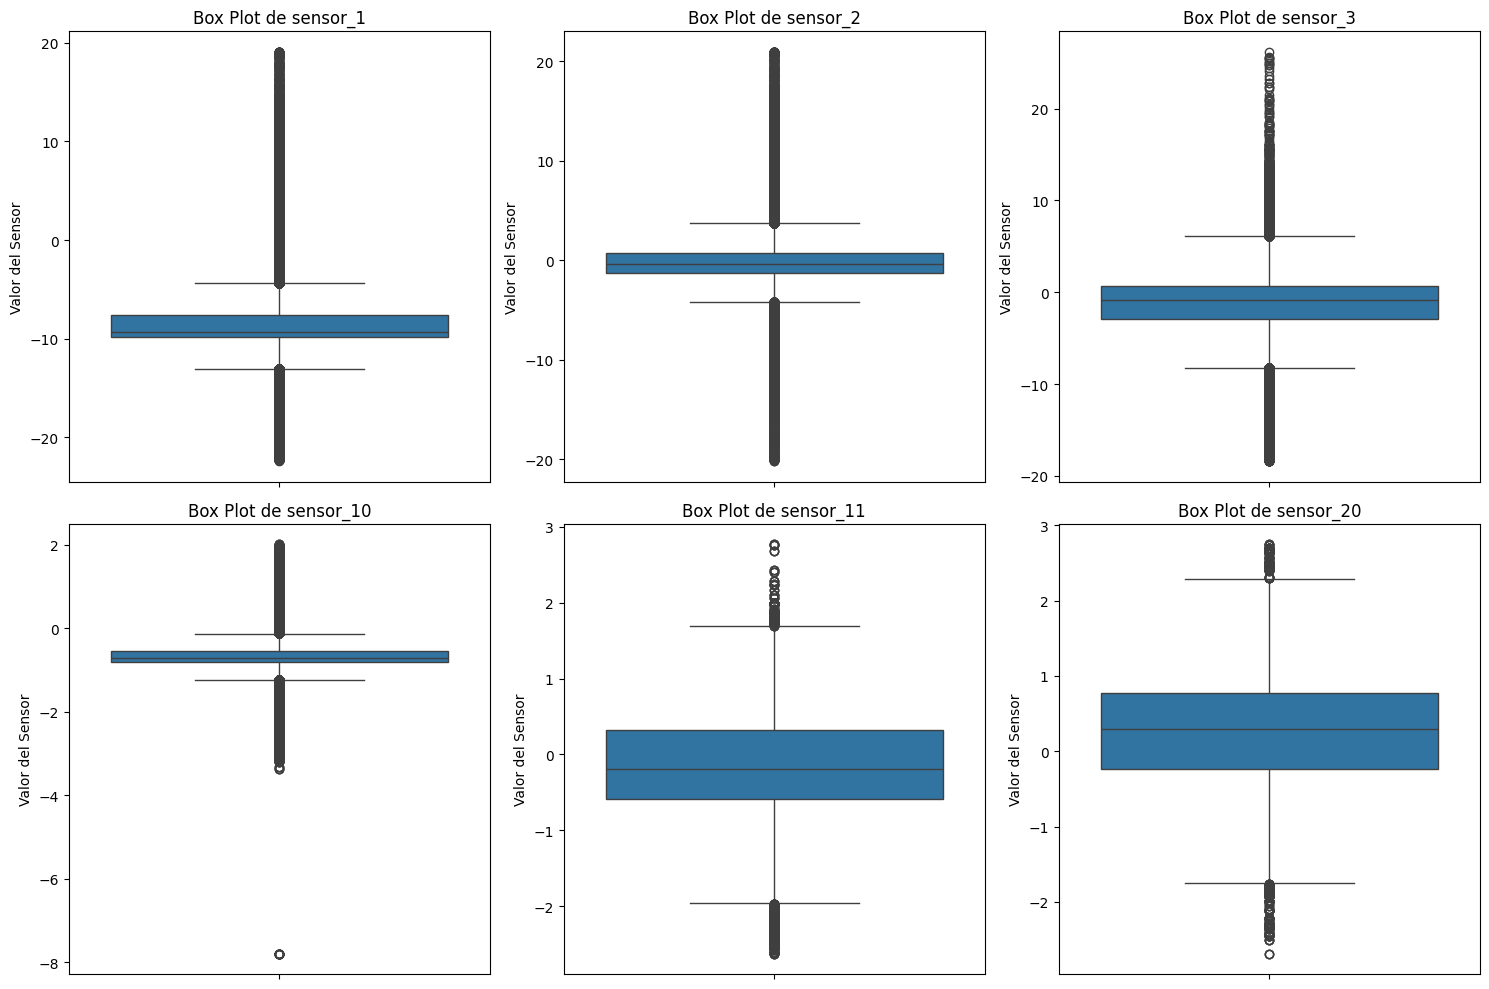

In [11]:
# Seleccionar un subconjunto de sensores para la visualización
selected_sensors = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_10', 'sensor_11', 'sensor_20']

# Crear box plots para los sensores seleccionados
plt.figure(figsize=(15, 10))
for i, sensor in enumerate(selected_sensors):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=mhealth_df[sensor])
    plt.title(f'Box Plot de {sensor}')
    plt.ylabel('Valor del Sensor')
plt.tight_layout()
plt.show()

**Reflexión**: Los box plots muestran una gran cantidad de valores atípicos en la mayoría de los sensores. Estos valores extremos podrían ser el resultado de movimientos bruscos, picos en las lecturas de los sensores, o simplemente variaciones naturales en los datos fisiológicos. En este caso, no los eliminaremos, ya que podrían contener información relevante sobre la naturaleza de las actividades, como los picos de aceleración.

##4.- Limpieza y Preprocesamiento Inicial
El preprocesamiento es una etapa fundamental para asegurar que los datos estén en un formato adecuado para los algoritmos de machine learning.

###4.1.- Estandarización de Variables
Dada la variabilidad en la escala de los sensores, la estandarización es el método más adecuado. Transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que es crucial para algoritmos basados en distancias como el SVM o la regresión logística.

In [12]:
# Definir las columnas de los sensores
sensor_cols = [f"sensor_{i}" for i in range(1, 24)]

# Inicializar el estandarizador
scaler = StandardScaler()

# Ajustar y transformar los datos de los sensores
mhealth_df[sensor_cols] = scaler.fit_transform(mhealth_df[sensor_cols])

print("Datos de los sensores estandarizados.")
print("\nResumen estadístico del DataFrame después de la estandarización:")
print(mhealth_df.describe())

Datos de los sensores estandarizados.

Resumen estadístico del DataFrame después de la estandarización:
           sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean   8.576460e-16 -1.776729e-18 -9.631744e-17 -4.839250e-18 -3.769706e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.414637e+00 -9.338210e+00 -4.852900e+00 -1.153833e+01 -1.184956e+01   
25%   -3.144901e-01 -4.950545e-01 -5.067903e-01 -3.071371e-01 -2.529074e-01   
50%   -1.936153e-01 -6.536311e-02  5.197011e-02 -8.846087e-02 -5.138178e-02   
75%    2.172265e-01  4.318847e-01  4.985392e-01  2.199345e-01  2.134911e-01   
max    6.776537e+00  9.883805e+00  7.624711e+00  1.141181e+01  1.172372e+01   

           sensor_6      sensor_7      sensor_8      sensor_9     sensor_10  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean  -1.953467e-16 -2.002

**Reflexión**: El resumen estadístico posterior a la estandarización confirma que las medias de los sensores están muy cerca de 0 y las desviaciones estándar cerca de 1, lo que indica que el proceso fue exitoso. Los datos ahora están listos para ser utilizados en modelos de aprendizaje automático.

##Conclusiones
Este notebook ha demostrado las primeras etapas del ciclo de vida de un proyecto de ciencia de datos: carga, exploración y preprocesamiento. Hemos logrado:

- Cargar y consolidar el dataset MHEALTH.
- Entender la estructura y los tipos de datos, así como la distribución de las variables.
- Identificar y visualizar la distribución de las actividades y los valores atípicos en los sensores.
- Estandarizar las variables numéricas, preparando el dataset para futuras tareas de modelado.

Los siguientes pasos en el proyecto incluirían la creación de ventanas de datos (ya que los datos son de series temporales) y la aplicación de modelos de clasificación para predecir las actividades. Este trabajo es una base sólida para continuar con el análisis y el desarrollo de un modelo predictivo.